In [26]:
import json
import matplotlib.pyplot as plt

# Load the ontology from a file
with open('datasets/ontology.json', 'r') as f:
    ontology = json.load(f)

# Re-ordered species counts following the hierarchy in the ontology (species within their genus, class, and binary)
species_counts = {
    # Biotic
    "zostera marina": 5994,          # Genus: Zostera, Class: Monocots
    "urospora": 4187,                # Genus: Urospora, Class: Chlorophyta
    "ulva intestinalis": 1513,       # Genus: Ulva, Class: Chlorophyta
    "fucus vesiculosus": 2910,       # Genus: Fucus, Class: Phaeophyceae
    "saccharina latissima": 1612,    # Genus: Saccharina, Class: Phaeophyceae
    "henricia": 1515,                # Genus: Henricia, Class: Asteroidea
    "asterias rubens": 1650,         # Genus: Asterias, Class: Asteroidea
    "myxine glurinosa": 1737,        # Genus: Myxine, Class: Myxini
    "mytilus edulis": 3808,          # Genus: Mya, Class: Bivalia

    # Abiotic
    "pipe": 1916,                    # Genus: Cylindrical, Class: Artificial
    "rock": 1320,                    # Genus: Solid, Class: Natural
    "tree": 2626                     # Genus: Arboral, Class: Natural
}

# Recursive function to aggregate counts and build the data structure
def build_hierarchy(node, species_counts, hierarchy_counts):
    # If the node is a species, return its count
    if "children" not in node:
        species_count = species_counts.get(node["name"], 0)
        hierarchy_counts[node["name"]] = species_count  # Store the species count
        return species_count

    # Initialize the total count for this node
    total_count = 0

    # Recursively process all children and sum their counts
    for child in node["children"]:
        total_count += build_hierarchy(child, species_counts, hierarchy_counts)

    # Store the total count for this node (sum of all its children)
    hierarchy_counts[node["name"]] = total_count
    return total_count

# Initialize the dictionary to hold counts for all nodes
hierarchy_counts = {}

# Build the hierarchy and compute the counts
build_hierarchy(ontology, species_counts, hierarchy_counts)

# Function to query counts at a specific level (binary, class, genus, etc.)
def get_level_counts(node, level, results):
    if node.get('rank') == level:
        results[node['name']] = hierarchy_counts[node['name']]
    
    if 'children' in node:
        for child in node['children']:
            get_level_counts(child, level, results)

# Initialize dictionaries for each level
binary_counts = {}
class_counts = {}
genus_counts = {}
species_counts_fixed = {}

# Get counts for each level
get_level_counts(ontology, "binary", binary_counts)
get_level_counts(ontology, "class", class_counts)
get_level_counts(ontology, "genus", genus_counts)
get_level_counts(ontology, "species", species_counts_fixed)

# Check if sums across levels match
species_total = sum(species_counts_fixed.values())
genus_total = sum(genus_counts.values())
class_total = sum(class_counts.values())
binary_total = sum(binary_counts.values())

print(f"Species Total (calculated): {species_total}")
print(f"Genus Total (calculated): {genus_total}")
print(f"Class Total (calculated): {class_total}")
print(f"Binary Total (calculated): {binary_total}")

# Use species_counts for plotting to reflect the predefined ordering
# You can continue with plotting using species_counts as intended.

del species_counts_fixed['asteroidea']

Species Total (calculated): 30788
Genus Total (calculated): 30788
Class Total (calculated): 30788
Binary Total (calculated): 30788


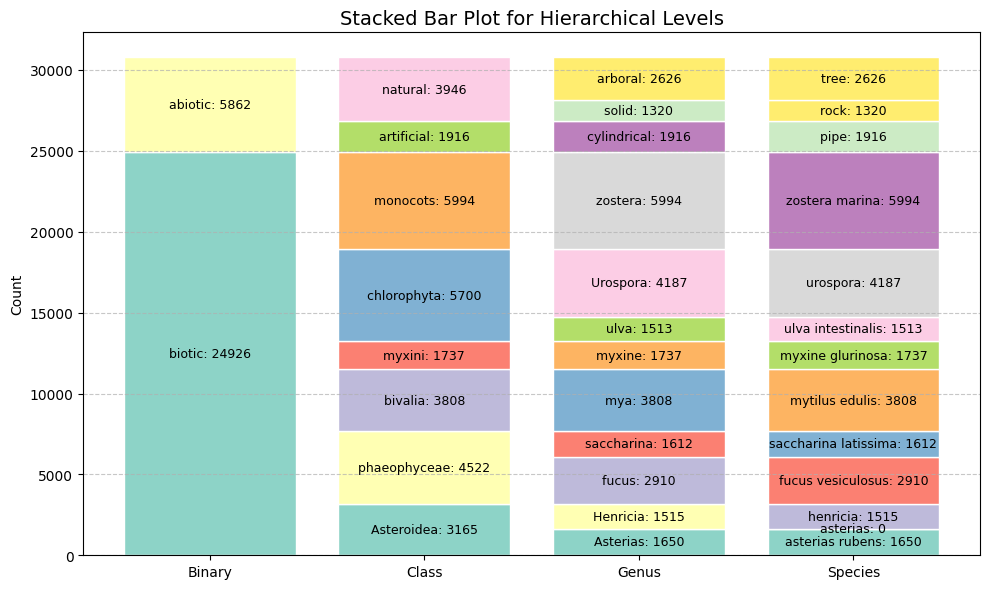

In [34]:
import matplotlib.pyplot as plt

# Hierarchical levels and their corresponding values
levels = ['Binary', 'Class', 'Genus', 'Species']
level_vals = [binary_counts, class_counts, genus_counts, species_counts_fixed]

# Initialize figure and axis
fig, ax = plt.subplots(figsize=(10, 6))

# Define distinct colors for each category across levels using a large enough colormap
colors = plt.cm.Set3(range(max([len(lev) for lev in level_vals])))

# Create stacked bar plot for each level
for i, (level, levvals) in enumerate(zip(levels, level_vals)):
    bottom = 0  # To stack bars on top of each other
    for j, (category, value) in enumerate(levvals.items()):
        ax.bar(level, value, bottom=bottom, color=colors[j], edgecolor='white', label=category if i == 0 else "")
        # Adding labels directly to each stacked section
        ax.text(i, bottom + value / 2, f'{category}: {value}', ha='center', va='center', color='black', fontsize=9)
        bottom += value

# Add labels, title, and improve the aesthetics
ax.set_ylabel('Count')
ax.set_title('Stacked Bar Plot for Hierarchical Levels', fontsize=14)

# Improve the layout and add gridlines for better readability
ax.grid(True, axis='y', linestyle='--', alpha=0.7)
plt.tight_layout()

# Save the figure as an SVG file for Inkscape editing
plt.savefig('hierarchical_plot.svg', format='svg', bbox_inches='tight')

# Show the final plot
plt.show()